# Download data
## Pre-requirement: Need to upload kaggle.json file in the pwd first

In [1]:
!pip install kaggle

You are using pip version 10.0.1, however version 20.0.2 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [2]:
!mkdir -p /home/ec2-user/.kaggle

In [3]:
!mv kaggle.json /home/ec2-user/.kaggle/.
!chmod 600 /home/ec2-user/.kaggle/kaggle.json

In [4]:
!kaggle --version

Kaggle API 1.5.6


In [5]:
base_dir='/tmp'
zip_file='chest-xray-pneumonia.zip'
img_stage_one_dir = 'chest_xray'

In [6]:
!kaggle datasets download -d paultimothymooney/chest-xray-pneumonia -p $base_dir/

100%|█████████████████████████████████████▉| 2.29G/2.29G [01:01<00:00, 33.2MB/s]
100%|██████████████████████████████████████| 2.29G/2.29G [01:01<00:00, 39.8MB/s]


In [7]:
!unzip $base_dir/$zip_file -d $base_dir

Archive:  /tmp/chest-xray-pneumonia.zip
  inflating: /tmp/chest_xray/__MACOSX/._chest_xray  
  inflating: /tmp/chest_xray/__MACOSX/chest_xray/._.DS_Store  
  inflating: /tmp/chest_xray/__MACOSX/chest_xray/._test  
  inflating: /tmp/chest_xray/__MACOSX/chest_xray/._train  
  inflating: /tmp/chest_xray/__MACOSX/chest_xray/test/._.DS_Store  
  inflating: /tmp/chest_xray/__MACOSX/chest_xray/test/._NORMAL  
  inflating: /tmp/chest_xray/__MACOSX/chest_xray/test/._PNEUMONIA  
  inflating: /tmp/chest_xray/__MACOSX/chest_xray/test/NORMAL/._IM-0001-0001.jpeg  
  inflating: /tmp/chest_xray/__MACOSX/chest_xray/test/NORMAL/._IM-0003-0001.jpeg  
  inflating: /tmp/chest_xray/__MACOSX/chest_xray/test/NORMAL/._IM-0005-0001.jpeg  
  inflating: /tmp/chest_xray/__MACOSX/chest_xray/test/NORMAL/._IM-0006-0001.jpeg  
  inflating: /tmp/chest_xray/__MACOSX/chest_xray/test/NORMAL/._IM-0007-0001.jpeg  
  inflating: /tmp/chest_xray/__MACOSX/chest_xray/test/NORMAL/._IM-0009-0001.jpeg  
  inflating: /tmp/chest_xray

In [8]:
!ls -ltr $base_dir/

total 2405772
drwxr-xr-x 3 root       root             4096 Mar 23 21:18 lib
drwxr-xr-x 3 root       root             4096 Mar 23 21:18 brazil-npm-registry
-rw-r--r-- 1 root       root               61 Mar 23 21:19 lua_yK1yxB
drwxr-xr-x 3 ec2-user   ec2-user         4096 Mar 23 21:36 npm-21744-615308d8
drwxr-xr-x 2 ec2-user   ec2-user         4096 Mar 23 21:36 yarn--1584999400719-0.8741022853431235
drwxr-xr-x 2 ec2-user   ec2-user         4096 Mar 23 21:36 yarn--1584999400719-0.8279815012786298
-rw-r--r-- 1 ec2-user   ec2-user          543 Mar 23 21:36 core-js-banners
drwxr-xr-x 2 ec2-user   ec2-user         4096 Mar 23 21:36 yarn--1584999401550-0.5933178171052602
drwxr-xr-x 2 ec2-user   ec2-user         4096 Mar 23 21:36 yarn--1584999405887-0.9040280121663642
drwxr-xr-x 3 ec2-user   ec2-user         4096 Mar 23 21:37 v8-compile-cache-500
drwxr-xr-x 3 ec2-user   ec2-user         4096 Mar 23 21:40 npm-22266-f72d13b1
drwxr-xr-x 3 ec2-user   ec2-user         4096 Mar 23 21:40 npm-22295-17

In [9]:
!ls -ltr $base_dir/$img_stage_one_dir/train/NORMAL

total 803584
-rw-rw-r-- 1 ec2-user ec2-user  400647 Sep 28  2019 IM-0128-0001.jpeg
-rw-rw-r-- 1 ec2-user ec2-user  669289 Sep 28  2019 IM-0127-0001.jpeg
-rw-rw-r-- 1 ec2-user ec2-user  451292 Sep 28  2019 IM-0125-0001.jpeg
-rw-rw-r-- 1 ec2-user ec2-user  471556 Sep 28  2019 IM-0122-0001.jpeg
-rw-rw-r-- 1 ec2-user ec2-user  582639 Sep 28  2019 IM-0119-0001.jpeg
-rw-rw-r-- 1 ec2-user ec2-user  406305 Sep 28  2019 IM-0117-0001.jpeg
-rw-rw-r-- 1 ec2-user ec2-user  870784 Sep 28  2019 IM-0115-0001.jpeg
-rw-rw-r-- 1 ec2-user ec2-user  415537 Sep 28  2019 IM-0189-0001.jpeg
-rw-rw-r-- 1 ec2-user ec2-user  716369 Sep 28  2019 IM-0187-0001.jpeg
-rw-rw-r-- 1 ec2-user ec2-user  430109 Sep 28  2019 IM-0185-0001.jpeg
-rw-rw-r-- 1 ec2-user ec2-user 1072697 Sep 28  2019 IM-0183-0001.jpeg
-rw-rw-r-- 1 ec2-user ec2-user  352757 Sep 28  2019 IM-0182-0001.jpeg
-rw-rw-r-- 1 ec2-user ec2-user  965264 Sep 28  2019 IM-0180-0001.jpeg
-rw-rw-r-- 1 ec2-user ec2-user  477494 Sep 28  2019 IM-0178-0001.jpeg
-rw-rw-

# Data Transform

In [10]:
# https://pillow.readthedocs.io/en/stable/reference/Image.html

from PIL import Image
import numpy as np
import glob
import os

In [11]:
size = (224, 224)
img_stage_two_dir = 'chest_xray_standard'

In [12]:
mkdir -p /$base_dir/$img_stage_two_dir

In [13]:

for infile in glob.glob("/{0}/{1}/*/*/*.jpeg".format(base_dir, img_stage_one_dir)):
    file, ext = os.path.splitext(infile)
    im = Image.open(infile)
    im_resized = im.resize(size)
    new_file_name = file.replace('chest_xray', img_stage_two_dir)
    os.makedirs("/".join(new_file_name.split("/")[:-1]), exist_ok=True)
    im_resized.save("{0}.jpeg".format(new_file_name, "JPEG"))

In [14]:
!ls -lat -h $base_dir/$img_stage_two_dir/train/NORMAL

total 13M
-rw-rw-r-- 1 ec2-user ec2-user 7.8K Apr  2 00:02 IM-0427-0001.jpeg
drwxrwxr-x 2 ec2-user ec2-user  88K Apr  2 00:02 .
-rw-rw-r-- 1 ec2-user ec2-user 7.2K Apr  2 00:02 IM-0533-0001-0001.jpeg
-rw-rw-r-- 1 ec2-user ec2-user 7.3K Apr  2 00:02 NORMAL2-IM-1360-0001.jpeg
-rw-rw-r-- 1 ec2-user ec2-user 7.4K Apr  2 00:02 IM-0693-0001.jpeg
-rw-rw-r-- 1 ec2-user ec2-user 7.8K Apr  2 00:02 IM-0519-0001-0001.jpeg
-rw-rw-r-- 1 ec2-user ec2-user 7.5K Apr  2 00:02 NORMAL2-IM-0587-0001.jpeg
-rw-rw-r-- 1 ec2-user ec2-user 7.6K Apr  2 00:02 NORMAL2-IM-1322-0001.jpeg
-rw-rw-r-- 1 ec2-user ec2-user 8.0K Apr  2 00:02 NORMAL2-IM-1288-0001.jpeg
-rw-rw-r-- 1 ec2-user ec2-user 7.7K Apr  2 00:02 NORMAL2-IM-1289-0001.jpeg
-rw-rw-r-- 1 ec2-user ec2-user 8.3K Apr  2 00:02 NORMAL2-IM-0480-0001.jpeg
-rw-rw-r-- 1 ec2-user ec2-user 7.5K Apr  2 00:02 NORMAL2-IM-1164-0001.jpeg
-rw-rw-r-- 1 ec2-user ec2-user 7.4K Apr  2 00:02 IM-0657-0001.jpeg
-rw-rw-r-- 1 ec2-user ec2-user 7.9K Apr  2 00:02 IM-0545-0001-0001.jp

In [15]:
# Display the image
import matplotlib.pyplot as plt
from PIL import Image

In [16]:
%matplotlib inline

//tmp/chest_xray_standard/val/PNEUMONIA/person1951_bacteria_4882.jpeg


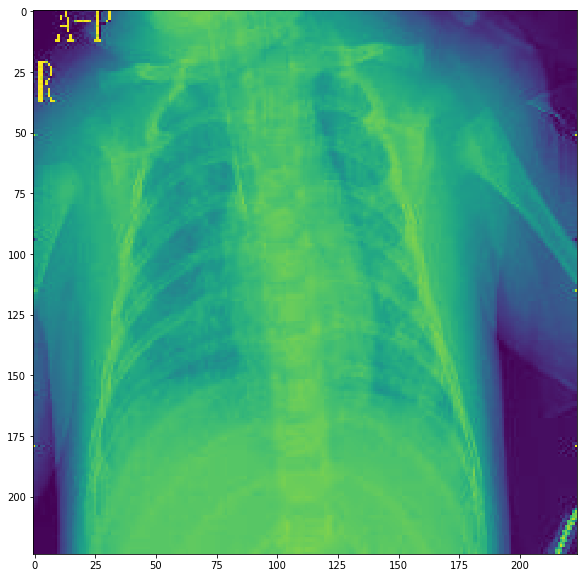

In [18]:
plt.figure(figsize=(10, 10))
image_path = glob.glob("/{0}/{1}/*/*/*.jpeg".format(base_dir, img_stage_two_dir, 'NORMAL'))[0]
print(image_path)
plt.imshow(Image.open(image_path))

//tmp/chest_xray_standard/val/PNEUMONIA/person1951_bacteria_4882.jpeg


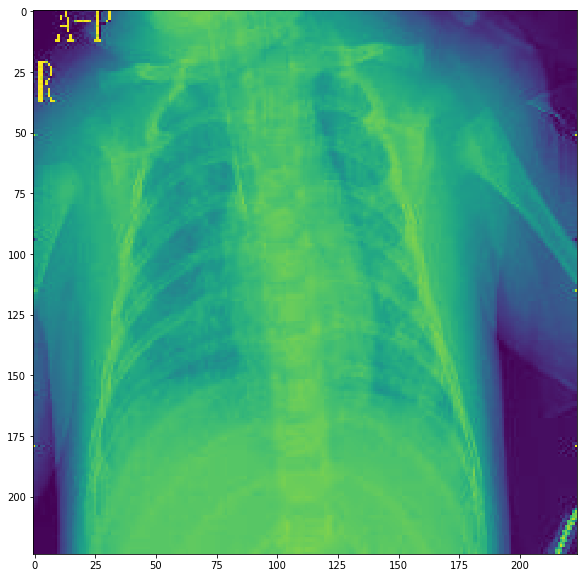

In [19]:
plt.figure(figsize=(10, 10))
image_path = glob.glob("/{0}/{1}/*/*/*.jpeg".format(base_dir, img_stage_two_dir, 'PNEUMONIA'))[0]
print(image_path)
plt.imshow(Image.open(image_path))

# Creating RecordIO files

In [ ]:
!cat /home/ec2-user/anaconda3/envs/amazonei_mxnet_p36/lib/python3.6/site-packages/mxnet/tools/im2rec.py

In [20]:
import sys,os

sys.path

['',
 '/home/ec2-user/anaconda3/envs/amazonei_mxnet_p36/lib/python36.zip',
 '/home/ec2-user/anaconda3/envs/amazonei_mxnet_p36/lib/python3.6',
 '/home/ec2-user/anaconda3/envs/amazonei_mxnet_p36/lib/python3.6/lib-dynload',
 '/home/ec2-user/anaconda3/envs/amazonei_mxnet_p36/lib/python3.6/site-packages',
 '/home/ec2-user/anaconda3/envs/amazonei_mxnet_p36/lib/python3.6/site-packages/IPython/extensions',
 '/home/ec2-user/.ipython']

In [21]:
# Here we will search for the python script im2rec
suffix='/mxnet/tools/im2rec.py'
im2rec = list(filter( (lambda x: os.path.isfile(x + suffix )), sys.path))[0] + suffix

%env IM2REC=$im2rec
%env BASE_DIR=$base_dir

env: IM2REC=/home/ec2-user/anaconda3/envs/amazonei_mxnet_p36/lib/python3.6/site-packages/mxnet/tools/im2rec.py
env: BASE_DIR=/tmp


In [22]:
img_stage_three_dir = 'chest_xray_recordio'

In [23]:
!ls $base_dir/$img_stage_two_dir/train

NORMAL	PNEUMONIA


In [24]:
!mkdir -p $base_dir/$img_stage_three_dir/train
!mkdir -p $base_dir/$img_stage_three_dir/test
!mkdir -p $base_dir/$img_stage_three_dir/val

In [25]:
!pwd

/home/ec2-user/SageMaker


In [26]:
%%bash

cd $BASE_DIR
python $IM2REC chest_xray_recordio/test chest_xray_standard/test/ --recursive --list --num-thread 8
python $IM2REC chest_xray_recordio/train chest_xray_standard/train/ --recursive --list --num-thread 8
python $IM2REC chest_xray_recordio/val chest_xray_standard/val/ --recursive --list --num-thread 8

NORMAL 0
PNEUMONIA 1
NORMAL 0
PNEUMONIA 1
NORMAL 0
PNEUMONIA 1


In [27]:
!cat $base_dir/$img_stage_three_dir/val.lst

11	1.000000	PNEUMONIA/person1949_bacteria_4880.jpeg
8	1.000000	PNEUMONIA/person1946_bacteria_4874.jpeg
13	1.000000	PNEUMONIA/person1951_bacteria_4882.jpeg
3	0.000000	NORMAL/NORMAL2-IM-1436-0001.jpeg
9	1.000000	PNEUMONIA/person1946_bacteria_4875.jpeg
0	0.000000	NORMAL/NORMAL2-IM-1427-0001.jpeg
15	1.000000	PNEUMONIA/person1954_bacteria_4886.jpeg
1	0.000000	NORMAL/NORMAL2-IM-1430-0001.jpeg
10	1.000000	PNEUMONIA/person1947_bacteria_4876.jpeg
5	0.000000	NORMAL/NORMAL2-IM-1438-0001.jpeg
6	0.000000	NORMAL/NORMAL2-IM-1440-0001.jpeg
2	0.000000	NORMAL/NORMAL2-IM-1431-0001.jpeg
12	1.000000	PNEUMONIA/person1950_bacteria_4881.jpeg
14	1.000000	PNEUMONIA/person1952_bacteria_4883.jpeg
7	0.000000	NORMAL/NORMAL2-IM-1442-0001.jpeg
4	0.000000	NORMAL/NORMAL2-IM-1437-0001.jpeg


In [28]:
!wc -l $base_dir/$img_stage_three_dir/test.lst

624 /tmp/chest_xray_recordio/test.lst


In [29]:
!wc -l $base_dir/$img_stage_three_dir/train.lst

5216 /tmp/chest_xray_recordio/train.lst


In [30]:
!wc -l $base_dir/$img_stage_three_dir/val.lst

16 /tmp/chest_xray_recordio/val.lst


In [31]:
%env DATAPATH=$base_dir/$img_stage_two_dir
%env TRAINLST=$base_dir/$img_stage_three_dir/train.lst
%env TESTLST=$base_dir/$img_stage_three_dir/test.lst
%env VALLST=$base_dir/$img_stage_three_dir/val.lst

env: DATAPATH=/tmp/chest_xray_standard
env: TRAINLST=/tmp/chest_xray_recordio/train.lst
env: TESTLST=/tmp/chest_xray_recordio/test.lst
env: VALLST=/tmp/chest_xray_recordio/val.lst


In [32]:
%%bash 
cd $BASE_DIR
python $IM2REC --num-thread=8 --pass-through --chunks 10 $VALLST $DATAPATH/val
python $IM2REC --num-thread=8 --pass-through --chunks 10 $TRAINLST $DATAPATH/train
python $IM2REC --num-thread=8 --pass-through --chunks 10 $TESTLST $DATAPATH/test

Creating .rec file from /tmp/chest_xray_recordio/val.lst in /tmp/chest_xray_recordio
time: 0.004103183746337891  count: 0
Creating .rec file from /tmp/chest_xray_recordio/train.lst in /tmp/chest_xray_recordio
time: 0.003971576690673828  count: 0
time: 0.11353039741516113  count: 1000
time: 0.14675092697143555  count: 2000
time: 0.14173102378845215  count: 3000
time: 0.15661191940307617  count: 4000
time: 0.14525723457336426  count: 5000
Creating .rec file from /tmp/chest_xray_recordio/test.lst in /tmp/chest_xray_recordio
time: 0.0009112358093261719  count: 0


In [33]:
!ls -ltr -h $base_dir/$img_stage_three_dir

total 40M
drwxrwxr-x 2 ec2-user ec2-user 4.0K Apr  2 00:06 train
drwxrwxr-x 2 ec2-user ec2-user 4.0K Apr  2 00:06 test
drwxrwxr-x 2 ec2-user ec2-user 4.0K Apr  2 00:06 val
-rw-rw-r-- 1 ec2-user ec2-user  29K Apr  2 00:19 test.lst
-rw-rw-r-- 1 ec2-user ec2-user 254K Apr  2 00:19 train.lst
-rw-rw-r-- 1 ec2-user ec2-user  766 Apr  2 00:19 val.lst
-rw-rw-r-- 1 ec2-user ec2-user 107K Apr  2 00:21 val.rec
-rw-rw-r-- 1 ec2-user ec2-user  130 Apr  2 00:21 val.idx
-rw-rw-r-- 1 ec2-user ec2-user  35M Apr  2 00:21 train.rec
-rw-rw-r-- 1 ec2-user ec2-user  69K Apr  2 00:21 train.idx
-rw-rw-r-- 1 ec2-user ec2-user 4.2M Apr  2 00:21 test.rec
-rw-rw-r-- 1 ec2-user ec2-user 7.1K Apr  2 00:21 test.idx


# Upload rec files

In [34]:
import boto3
import sagemaker

sagemaker_session = sagemaker.Session()
bucket=sagemaker_session.default_bucket()

In [37]:
# Format for models that require .rec files
train_path = sagemaker_session.upload_data(path=base_dir + '/' + img_stage_three_dir + '/train.rec', 
                                           key_prefix='{0}/train'.format(img_stage_three_dir))
test_path = sagemaker_session.upload_data(path=base_dir + '/' + img_stage_three_dir +'/test.rec', 
                                          key_prefix='{0}/test'.format(img_stage_three_dir))
val_path = sagemaker_session.upload_data(path=base_dir + '/'+ img_stage_three_dir +'/val.rec', 
                                         key_prefix='{0}/val'.format(img_stage_three_dir))

In [39]:
# Format for models that require image files
train_path = sagemaker_session.upload_data(path=base_dir + '/' + img_stage_two_dir + '/train', 
                                           key_prefix='{0}/train'.format(img_stage_two_dir))
test_path = sagemaker_session.upload_data(path=base_dir + '/' + img_stage_two_dir + '/test', 
                                          key_prefix='{0}/test'.format(img_stage_two_dir))
val_path = sagemaker_session.upload_data(path=base_dir + '/'+ img_stage_two_dir + '/val', 
                                         key_prefix='{0}/val'.format(img_stage_two_dir))

# Optional - move data to be preserved for testing

In [40]:
!mkdir chest_xray_standard
!cp -R /tmp/chest_xray_standard/* chest_xray_standard/

# References

https://github.com/udacity/ML_SageMaker_Studies

https://docs.aws.amazon.com/sagemaker/latest/APIReference/API_CreateTrainingJob.html

https://docs.aws.amazon.com/translate/latest/dg/API_InputDataConfig.html
    
https://docs.aws.amazon.com/sagemaker/latest/dg/image-classification.html
    
https://sunjackson.github.io/2018/09/13/84e31f8847e234adb7a5c3eadb253a14/#image-classification-with-amazon-sagemaker
    
https://gluon-cv.mxnet.io/build/examples_datasets/recordio.html
    
https://docs.aws.amazon.com/sagemaker/latest/dg/image-classification.html
    
https://github.com/leocvml/mxnet-im2rec_tutorial
    
https://github.com/awslabs/amazon-sagemaker-examples/blob/master/introduction_to_amazon_algorithms/imageclassification_caltech/Image-classification-fulltraining.ipynb